In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from imutils import resize

In [32]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
#     channel_count = img.shape[2]
    
    match_mask_color = 255
    cv.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv.bitwise_and(img, mask)
    return masked_image


In [36]:
def draw_line(image, lines):
    img = np.copy(image)
    blank_image = np.zeros_like(img, dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 3)
    img = cv.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [44]:
# image = cv.imread("./images/Lane1.jpg")
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
def process(image: np.array) -> np.array:
    height = image.shape[0]
    width = image.shape[1]

    region_of_interest_vertex = [
        (0, height),
        (width/2 - 200, height/2),
        (width/2 + 200, height/2),
        (width, height)
    ]

    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    canny = cv.Canny(gray, 100, 200)
    cropped_image = region_of_interest(canny, np.array([region_of_interest_vertex], np.int32))
    lines = cv.HoughLinesP(cropped_image, 6, np.pi/60, 160, lines=np.array([]), minLineLength=40, maxLineGap=25)
    image_lines = draw_line(image, lines)
    
    return image_lines

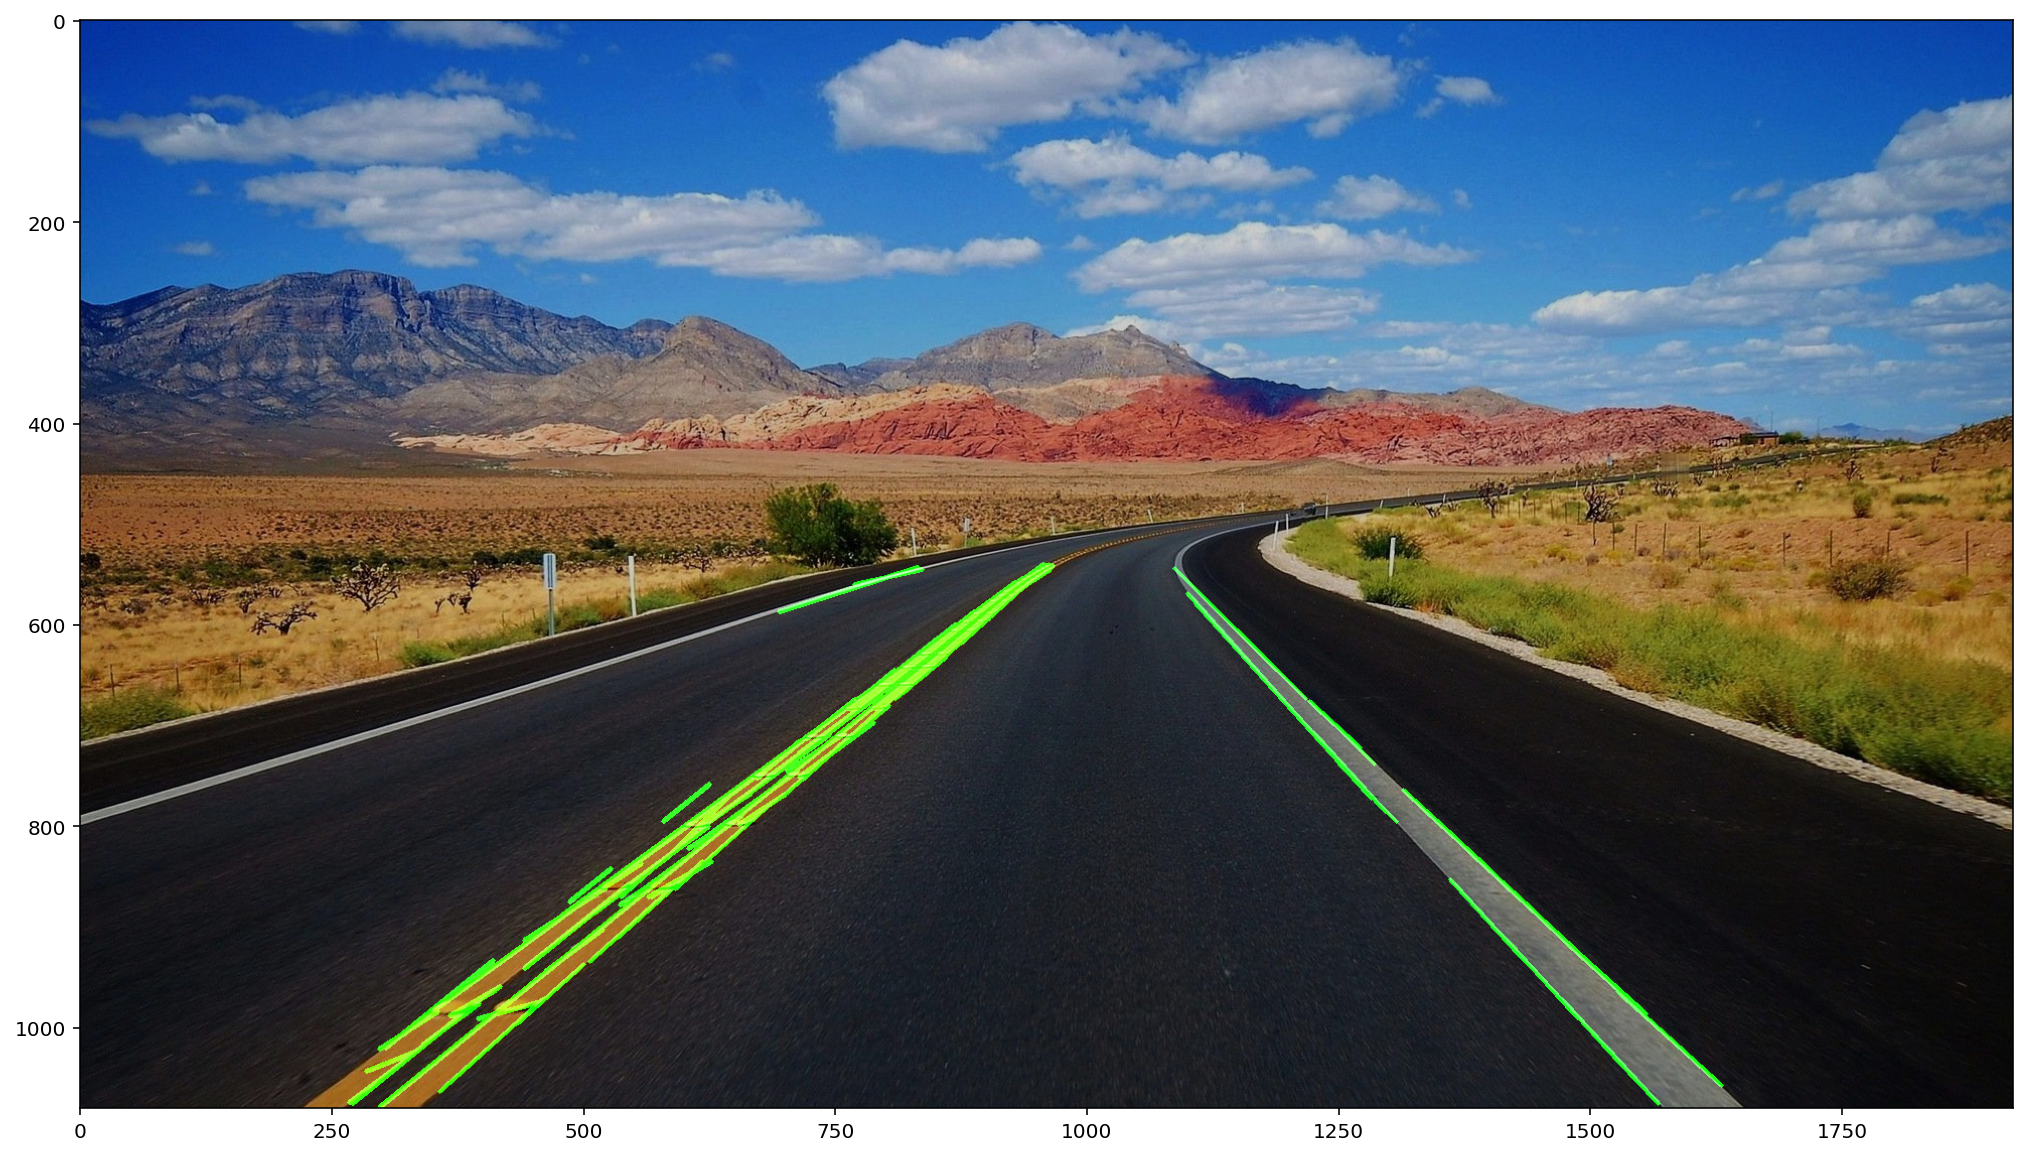

In [45]:
image = process(cv.imread("./images/Lane1.jpg"))
plt.figure(figsize=(20,10))
plt.imshow(image_lines)
plt.show()